# Classification template

## Importing the libraries

In [6]:
!pip install -r requirements.txt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Pre-Processing
### Importing the dataset

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Visualising the set results

In [8]:
def plotarGrafico(X_dados, y_dados, classifier, tipo_classificacao, nome):
	from matplotlib.colors import ListedColormap
	X_set, y_set = X_dados, y_dados
	X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
	                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
	plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
	             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
	plt.xlim(X1.min(), X1.max())
	plt.ylim(X2.min(), X2.max())
	for i, j in enumerate(np.unique(y_set)):
	    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	                c = ListedColormap(('red', 'green'))(i), label = j)
	plt.title('Classifier '+nome+' ('+tipo_classificacao+' set)')
	plt.xlabel('Age')
	plt.ylabel('Estimated Salary')
	plt.legend()
	plt.show()

# Regressão Logistica
## Fitting classifier to the Training set

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


## Plota os graficos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


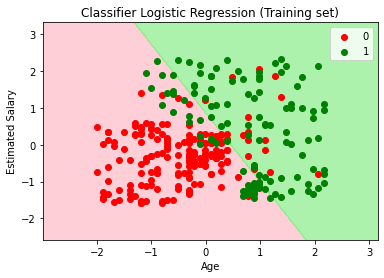

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


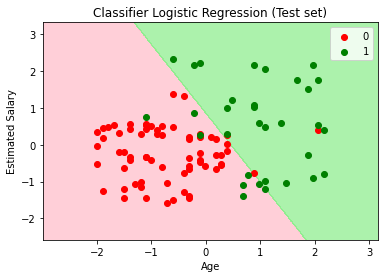

In [12]:
plotarGrafico(X_train, y_train, classifier, 'Training', 'Logistic Regression')
plotarGrafico(X_test, y_test, classifier, 'Test', 'Logistic Regression')

# Regressão ARD bayesiana

## Fitting classifier to the Training set


In [13]:
from sklearn import linear_model
classifier = linear_model.ARDRegression()
classifier.fit(X_train,y_train)

ARDRegression()

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cmARD = confusion_matrix(y_test, y_pred.round())
print(cmARD)

[[65  3]
 [ 7 25]]


## Plota os graficos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


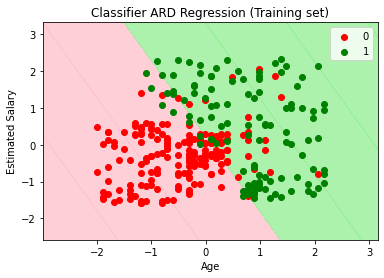

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


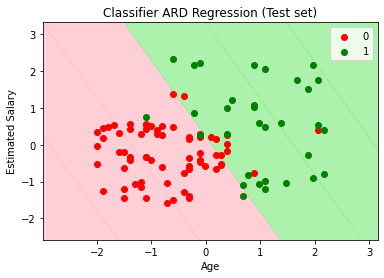

In [16]:
plotarGrafico(X_train, y_train, classifier, 'Training', 'ARD Regression')
plotarGrafico(X_test, y_test, classifier, 'Test', 'ARD Regression')

# Regressão ARD bayesiana
## Fitting classifier to the Training set

In [17]:
from sklearn import linear_model
classifier = linear_model.LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cmLinear = confusion_matrix(y_test, y_pred.round())
print(cmLinear)

[[65  3]
 [ 8 24]]


## Plota os graficos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


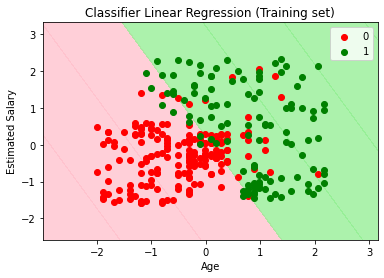

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


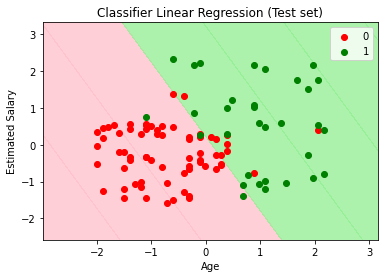

In [20]:
plotarGrafico(X_train, y_train, classifier, 'Training', 'Linear Regression')
plotarGrafico(X_test, y_test, classifier, 'Test', 'Linear Regression')